# Homework 6 - Machine Learning II


## Deadline: October 28th, at noon (12:00)

#### About this homework

In this homework, we will get familiar with the concepts of confusion matrix and imbalanced data. Furthermore, we will compare different classifiers. Before solving these tasks, please make sure that you have looked through the slides of Lecture 07.

#### General instructions

Please look up the general instructions about homeworks in the first homework.

#### Tracking your time

We will appreciate if you track your time spent on solving the homework and report it in the dedicated cells at the end of the homework. This is not compulsory and does not affect your grade in any way. The collected information will be used to improve future homeworks.

# Task 1. Confusion matrix   (1 point)

There is information about the predictions of two classifiers A and B in <code>predictions.csv</code> and the true labels (column 'Actual'). The labels indicate whether a patient had a disease (positive) or not (negative). Label 0 stands for no disease and label 1 stands for a disease.

**a. Build a confusion matrix for classifier A by substituting the ?? in the table given below with appropriate numbers.** <br>


In [1]:
# TODO
import pandas as pd

df = pd.read_csv("predictions.csv", index_col="ID")
print("Shape:", df.shape)
df.head()  # Top 5 rows

Shape: (200, 3)


,A,B,Actual
ID,,,
1,0,1,1
2,0,0,1
3,1,0,0
4,0,1,1
5,1,1,1


In [2]:
crossA = pd.crosstab(df['Actual'], df['A'], colnames=['A'], rownames=['Actual'], margins=True)

crossA 

A,0,1,All
Actual,,,
0,35,65,100
1,32,68,100
All,67,133,200


| ACTUAL\PREDICTED | DISEASE (1) | NO DISEASE (0) | TOTAL |
|------------------|-------------|----------------|-------|
|    DISEASE (1)   |      68     |        32      |   100  |
|  NO DISEASE (0)  |      65     |        35      |   100  |
|        TOTAL     |      133     |        67      |   200  |

**b. Build a confusion matrix for classifier B by substituting the ?? in the table given below with appropriate numbers.** <br>


In [3]:
# TODO
crossB = pd.crosstab(df['Actual'], df['B'], colnames=['B'], rownames=['Actual'], margins=True)

crossB 

B,0,1,All
Actual,,,
0,78,22,100
1,47,53,100
All,125,75,200


| ACTUAL\PREDICTED | DISEASE (1) | NO DISEASE (0) | TOTAL |
|------------------|-------------|----------------|-------|
|    DISEASE (1)   |      53     |        47      |   100  |
|  NO DISEASE (0)  |      22     |        78      |   100  |
|        TOTAL     |      75     |        125      |   200  |

**c.  Write the formulas of accuracy, precision, recall using TP, FP, etc notation.** <br>

$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

$$precision=\frac{TP}{TP+FP}$$

$$recall=\frac{TP}{TP+FN}$$

**d. For both classifiers A and B, calculate accuracy, precision, recall. For that use the confusion matrices from subtasks 1a and 1b.** <br>


In [4]:
# TODO
TP = crossA.loc[1,1]
TN = crossA.loc[0,0]
FN = crossA.loc[1,0]
FP = crossA.loc[0,1]

accuracy = (TN + TP)/(TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("A Accuracy: ", accuracy)
print("A Precision: ", precision)
print("A Recall: ", recall)

TP = crossB.loc[1,1]
TN = crossB.loc[0,0]
FN = crossB.loc[1,0]
FP = crossB.loc[0,1]

accuracy = (TN + TP)/(TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("B Accuracy: ", accuracy)
print("B Precision: ", precision)
print("B Recall: ", recall)

A Accuracy:  0.515
A Precision:  0.5112781954887218
A Recall:  0.68
B Accuracy:  0.655
B Precision:  0.7066666666666667
B Recall:  0.53


**<font color='red'>Accuracy of the classifier A:</font>** 0.52

**<font color='red'>Precision of the classifier A:</font>** 0.51

**<font color='red'>Recall of the classifier A:</font>** 0.68

**<font color='red'>Accuracy of the classifier B:</font>** 0.66

**<font color='red'>Precision of the classifier B:</font>** 0.71

**<font color='red'>Recall of the classifier B:</font>** 0.53

**e. Interpret  the values of accuracy, precision, recall for classifier A. Under interpretation we mean that you should come up with a very easily understandable sentence that explains the measure and result in a clear way (that would be understandable to all). For example if we would get 0.87 as accuracy on this data, it can be interpreted in the following way: 87% of the patients were diagnosed correctly.**

**<font color='red'>Accuracy:</font>** 52% of patients were diagnosed correctly.

**<font color='red'>Precision:</font>** 51% of predictions that diagnosed the disease were correct.

**<font color='red'>Recall:</font>** 68% of patients who had the disease were diagnosed correctly.

**f. Are all measures agreeing on the best classifier or are there differences (if yes then where)? Which classifier do you think is better and why?**

**<font color='red'>Answer:</font>** No, not all measures agree on the best classifier. Accuracy and precision is higher for classifier B. However, recall is higher for A. <br/> <br/> Recall is more important to be higher, because it is more dangerous not to diagnose the disease when a patient has it (FN) than diagnose when a patient has not (FP). If disease is not diagnosed then it will not be treated and that is worse than to treat the disease which is not there (also can be dangerous, but here the comparison is important). <br/> <br/> Overall, classifier B is still better because it has higher accuracy.

# Task 2.  Imbalanced dataset (1.5 points)

In this exercise, we are going to use a bank marketing dataset that was downloaded from the __[UCI website](https://archive.ics.uci.edu/ml/datasets/bank+marketing)__. The data is about direct marketing campaigns of a Portuguese bank. The marketing campaigns were based on phone calls. Often, more than one call to the same client was required, in order to determine whether the product (bank loan) would be taken (positive class '1') or not (negative class '0') by the given client. Suppose that the bank executives have asked you to build a classifier that would help them to predict the outcome of the campaign for new clients. <br>
You are given training data (<code>training.csv</code>) and two test datasets (<code>testing_1.csv</code> and <code>testing_2.csv</code>). The problem is that the training data are heavily imbalanced, with 95% of the instances reporting the negative outcome of the marketing campaign. You need to take this fact into account.

In [5]:
train =  pd.read_csv("training.csv")
test_1 =  pd.read_csv("testing_1.csv")
test_2 =  pd.read_csv("testing_2.csv")

**a. Count the number of negative outcomes and positive outcomes (column 'y') in training data.** <br>
Hint 1. You can use groupby and count()

In [6]:
# TODO
train.groupby(['y'])['y'].count()

y
0    950
1     50
Name: y, dtype: int64

**b. Count the number of negative outcomes and positive outcomes (column 'y') in test dataset 1 and in test dataset 2.** <br>

In [7]:
# TODO
test_1.groupby(['y'])['y'].count()

y
0    237
1     13
Name: y, dtype: int64

In [8]:
# TODO
test_2.groupby(['y'])['y'].count()

y
0    125
1    125
Name: y, dtype: int64

The decision tree and the random forest implementation in scikit-learn do not accept strings or categorical features. Implementation requires all features to be numerical. Thus, categorical values should be transformed into multiple binary features. This is called <b>one-hot-encoding</b>, where one binary (1/0) variable is introduced for each possible value of the categorical variable. For example, you might encode a column named 'color' with values ('red', 'green', 'blue') into 3 columns (color_red, color_green, color_blue) with binary values (value 1 if the category matches and 0 otherwise).

**c. It is better to encode the columns at the same time in training and test datasets. Therefore, let's join training and test sets into one dataFrame. Also, add an extra column to separate train and test datasets later.**

In [9]:
df1 = train.copy() 
df1['source'] = 'train' # Adding column named 'source' after 'y'

df2 = test_1.copy() 
df2['source'] = 'test_1'

df3 = test_2.copy() 
df3['source'] = 'test_2'

# TODO
data = pd.concat([df1, df2, df3])
data

,Unnamed: 0,X,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,source
0,1,1902,59,blue-collar,married,primary,no,0,no,no,cellular,18,nov,167,2,-1,0,unknown,0,train
1,2,3660,27,unemployed,single,secondary,no,0,yes,no,unknown,27,may,185,2,-1,0,unknown,0,train
2,3,3170,43,technician,married,secondary,no,-330,yes,yes,cellular,8,may,105,1,-1,0,unknown,0,train
3,4,1727,40,blue-collar,married,secondary,no,3765,yes,no,cellular,20,nov,87,2,-1,0,unknown,0,train
4,5,854,31,admin.,married,secondary,no,5,no,no,unknown,16,may,102,1,-1,0,unknown,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,4357,33,services,married,secondary,no,227,yes,yes,cellular,13,aug,477,2,-1,0,unknown,1,test_2
246,247,5097,52,technician,married,tertiary,no,2557,no,no,cellular,28,jan,134,5,204,2,success,1,test_2
247,248,4123,57,management,married,tertiary,no,2845,yes,no,telephone,19,apr,1143,5,-1,0,unknown,1,test_2
248,249,4278,50,unemployed,married,primary,no,705,no,no,unknown,5,jun,504,1,-1,0,unknown,1,test_2


**d. Find all columns with only 2 distinct values - for these there is no need to use one-hot-encoding. Replace values 'yes' and 'no' by 1 and 0, respectively (1=yes, 0=no).**<br>
Hint 1. You can use map() function.

In [10]:
# TODO

# Add your code
job=data.groupby(['job'])['job'].agg(['count'])
print(job)
marital=data.groupby(['marital'])['marital'].agg(['count'])
print(marital)
education=data.groupby(['education'])['education'].agg(['count'])
print(education)
default=data.groupby(['default'])['default'].agg(['count'])
print(default)
housing=data.groupby(['housing'])['housing'].agg(['count'])
print(housing)
loan=data.groupby(['loan'])['loan'].agg(['count'])
print(loan)
contact=data.groupby(['contact'])['contact'].agg(['count'])
print(contact)
month=data.groupby(['month'])['month'].agg(['count'])
print(month)
poutcome=data.groupby(['poutcome'])['poutcome'].agg(['count'])
print(poutcome)

               count
job                 
admin.           166
blue-collar      291
entrepreneur      48
housemaid         39
management       307
retired           88
self-employed     64
services         134
student           44
technician       274
unemployed        32
unknown           13
          count
marital        
divorced    160
married     903
single      437
           count
education       
primary      225
secondary    749
tertiary     464
unknown       62
         count
default       
no        1475
yes         25
         count
housing       
no         712
yes        788
      count
loan       
no     1254
yes     246
           count
contact         
cellular     991
telephone    111
unknown      398
       count
month       
apr      107
aug      233
dec        6
feb       99
jan       48
jul      238
jun      177
mar       15
may      408
nov      122
oct       27
sep       20
          count
poutcome       
failure     168
other        58
success      53
unknown  

In [11]:
data.loan = data.loan.map(dict(yes=1, no=0)) # Column "loan" values changed to one-hot-encoding.
data.default = data.default.map(dict(yes=1, no=0))
data.housing = data.housing.map(dict(yes=1, no=0))
data

,Unnamed: 0,X,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,source
0,1,1902,59,blue-collar,married,primary,0,0,0,0,cellular,18,nov,167,2,-1,0,unknown,0,train
1,2,3660,27,unemployed,single,secondary,0,0,1,0,unknown,27,may,185,2,-1,0,unknown,0,train
2,3,3170,43,technician,married,secondary,0,-330,1,1,cellular,8,may,105,1,-1,0,unknown,0,train
3,4,1727,40,blue-collar,married,secondary,0,3765,1,0,cellular,20,nov,87,2,-1,0,unknown,0,train
4,5,854,31,admin.,married,secondary,0,5,0,0,unknown,16,may,102,1,-1,0,unknown,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,4357,33,services,married,secondary,0,227,1,1,cellular,13,aug,477,2,-1,0,unknown,1,test_2
246,247,5097,52,technician,married,tertiary,0,2557,0,0,cellular,28,jan,134,5,204,2,success,1,test_2
247,248,4123,57,management,married,tertiary,0,2845,1,0,telephone,19,apr,1143,5,-1,0,unknown,1,test_2
248,249,4278,50,unemployed,married,primary,0,705,0,0,unknown,5,jun,504,1,-1,0,unknown,1,test_2


**e. Change all categorical columns into binary features using one-hot-encoding and divide the dataFrame back into train, test_1 and test_2. Do not forget to remove the column 'source'.**<br>
Hint 1: You can use **pandas** function <code>get_dummies()</code> to change categorical columns into binary columns. You can specify columns, which you would like to encode (<code>pd.get_dummies(data, columns=[...])</code>), then the column 'source' that you added in 2c will not be encoded. We would like to note that sometimes some of the columns in train dataset may contain values, which do not exist in the test dataset. Therefore, <code>get_dummies()</code> will generate columns, which may not exist in test dataset if you use <code>get_dummies()</code> on train and test dataset separately. Thus, it was important to join data frames before using <code>get_dummies()</code>.<br>
Hint 2. One solution would be to select all object columns (strings) except the column 'source' using <code>data.select_dtypes()</code>. <br>
Hint 3. You can use <code>dataFrame.drop()</code> to remove columns.

In [12]:
# TODO
data_dum = pd.get_dummies(data, columns=['job','marital','education','contact','month','poutcome'])
data_dum

,Unnamed: 0,X,age,default,balance,housing,loan,day,duration,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,1902,59,0,0,0,0,18,167,2,...,0,0,0,1,0,0,0,0,0,1
1,2,3660,27,0,0,1,0,27,185,2,...,0,0,1,0,0,0,0,0,0,1
2,3,3170,43,0,-330,1,1,8,105,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1727,40,0,3765,1,0,20,87,2,...,0,0,0,1,0,0,0,0,0,1
4,5,854,31,0,5,0,0,16,102,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,4357,33,0,227,1,1,13,477,2,...,0,0,0,0,0,0,0,0,0,1
246,247,5097,52,0,2557,0,0,28,134,5,...,0,0,0,0,0,0,0,0,1,0
247,248,4123,57,0,2845,1,0,19,1143,5,...,0,0,0,0,0,0,0,0,0,1
248,249,4278,50,0,705,0,0,5,504,1,...,1,0,0,0,0,0,0,0,0,1


In [13]:
# TODO

train = data_dum[data_dum['source']=='train']
test_1 = data_dum[data_dum['source']=='test_1']
test_2 = data_dum[data_dum['source']=='test_2']
test_1

,Unnamed: 0,X,age,default,balance,housing,loan,day,duration,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,4280,49,0,0,1,0,3,51,9,...,1,0,0,0,0,0,0,0,0,1
1,2,5455,77,0,992,0,0,27,147,2,...,0,0,0,0,0,0,1,0,0,0
2,3,5119,31,0,1447,1,0,21,225,2,...,0,0,0,1,0,0,0,1,0,0
3,4,4461,35,0,1,1,0,29,246,2,...,0,0,1,0,0,0,0,0,0,1
4,5,4722,58,0,1617,1,0,5,109,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,4487,55,0,2996,0,0,5,49,1,...,1,0,0,0,0,0,0,0,0,1
246,247,4426,33,0,658,1,0,12,146,2,...,0,0,0,0,1,0,1,0,0,0
247,248,4755,57,0,138,0,0,26,157,5,...,0,0,1,0,0,0,0,0,0,1
248,249,4545,45,0,102,1,0,11,282,1,...,0,0,1,0,0,0,0,0,0,1


**f. Create 6 different subsets from these three datasets (X_train, y_train, X_test_1, y_test_1, X_test_2, y_test_2). The X_train, X_test should have all features and not the outcome, whereas y_train and y_test should have only the outcome. The target value (outcome) is in the column 'y'.** <br>

In [15]:
# TODO
X_train = train.drop(['y', 'source'], axis=1)
y_train = train['y']
X_test_1 = test_1.drop(['y', 'source'], axis=1)
y_test_1 = test_1['y']
X_test_2 = test_2.drop(['y', 'source'], axis=1)
y_test_2 = test_2['y']

# Alternative version:
# X_train = train.loc[;, train.columns !='y']
# y_train = train.y


**g. Train a random forest classifier using RandomForestClassifier from sklearn (set <code>n_estimators=100</code>, <code>max_depth=4</code> and <code>random_state=0</code>) and use sklearn <code>confusion_matrix()</code> to interpret the results. Apply it to both test datasets. Please write a short discussion (2-3 sentences) about how well the model is predicting.**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# TODO
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, y_train) # fit model on the training set

In [17]:
y_pred = rf.predict(X_test) # let the model predict the values for the test set
confusion_matrix_result = confusion_matrix(y_test_1.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[  0  13]
 [  0 237]]


In [18]:
y_pred = rf.predict(X_test_2)
confusion_matrix_result = confusion_matrix(y_test_2.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[  0 125]
 [  0 125]]


**<font color='red'>Answer:</font>** The model is predicting perfectly TN, but making type II error with FN. This is due to imbalanced training set reporting 95% negative outcome, so model does not predict TP in both test sets. However, the statistics of predictions on both test sets are different because the proportions of true values differ, and for test set 1 it only looks better because there are less positive outcomes as true values.

**h. Use undersampling and create a balanced training dataset. Select all positive cases and randomly 50 negative cases. Show that your training dataset is balanced.**<br>
Hint 1. You can use dataFrame.sample()

In [19]:
# TODO

positive_cases = train[train['y'] == 1]
negative_sample = train[train['y'] == 0].sample(50, random_state=0)
train_balanced = pd.concat([positive_cases,negative_sample])
train_balanced.sort_index(inplace=True)

# split data into X and y
X_train_bal = train_balanced.drop(['y', 'source'], axis=1)
y_train_bal = train_balanced['y']

### TODO show that your training dataset is balanced
train_balanced.groupby(['y'])['y'].count()

y
0    50
1    50
Name: y, dtype: int64

**i. Train a random forest classifier on the balanced training dataset. Use the same parameters as in 2e. Predict and use sklearn <code>confusion_matrix()</code> to interpret the results. Apply it to both test datasets. Please write a short discussion (2-3 sentences) about how well the model is predicting.**

In [20]:
# TODO
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train_bal, y_train_bal)

In [21]:
y_pred = rf_model_balanced.predict(X_test_1)
confusion_matrix_result_balanced = confusion_matrix(y_test_1.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[ 11   2]
 [ 71 166]]


In [22]:
y_pred = rf_model_balanced.predict(X_test_2)
confusion_matrix_result_balanced = confusion_matrix(y_test_2.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[108  17]
 [ 47  78]]


**<font color='red'>Answer:</font>** Now the model's accuracy is much higher, because TPs are being predicted. In comparison with unbalanced training set, now the type I error with FPs is high in both test sets. In this case, the precision for test set 1 is much lower than for test set 2, but recall is fairly high in both sets.

# Task 3. Comparing models  (1.5 points)

In this task, you are going to generate your own data and build several classifiers for it. The aim is to investigate how the models "look like". We will end up with something like __[this](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)__.
<br>

**a. First, generate the training data. The data will have 2 features $x_{1}$ and $x_{2}$ (x-coordinate and y-coordinate respectively) and a binary label. Generate 2 datasets: one with 20 data points and another with 500 data points. To generate a single data point, choose $x_{1}$ randomly (as a real number) from the range (-5, 5), and $x_{2}$ also randomly from the same range. As you already understood, these data are interpretable as 2-dimensional. Now assign labels to the data points, such that inside the circle defined with the formula $(x_1 - 0)^2 + (x_2 - 0)^2 = 3^2$ the points are positive (class 1), and outside the circle the points are negative (class 0).**<br>
Hint 1. You can use numpy random.uniform to generate $x_1$ and $x_2$ <br>
Hint 2. If $(x - center_x)^2 + (y - center_y)^2 < radius^2$ then the point is inside the circle.

In [23]:
# TODO
import numpy as np
import matplotlib.patches as patches

x = np.random.uniform(-5,5,20)
y = np.random.uniform(-5,5,20)
label = (x-0)**2+(y-0)**2 < 9

data = pd.DataFrame({'x':x,'y':y,'label':label})
data['label'] = data['label'].astype(int) # True and False into 1 0

## TODO same for 500 data points

x = np.random.uniform(-5,5,500)
y = np.random.uniform(-5,5,500)
label = (x-0)**2+(y-0)**2 < 9
data2 = pd.DataFrame({'x':x,'y':y,'label':label})
data2['label'] = data2['label'].astype(int)

**b. Visualize all the training data that you generated on 2 scatter plots (one for 20 and another for 500 data points).**<br>
Hint 1: You can use the seaborn library and hue parameter to color both classes very easily<br>

You may get something like this (500 data points)
![title](dataset_2.jpg)

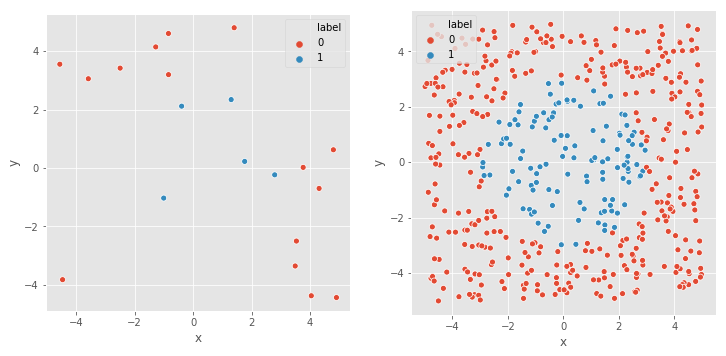

In [26]:
# TODO
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 6]
plt.style.use('ggplot')

plt.subplot(121)
sns.scatterplot(x='x', y='y', hue='label', data=data).set_aspect('equal')

plt.subplot(122)
sns.scatterplot(x='x', y='y', hue='label', data=data2).set_aspect('equal')

# Alternative version
# data['inside']=data.apply(lambda row: 1 if row['label']<9 else 0, axis=1)
# ax=sns.scatterplot(x='x', y='y', hue='inside', data=data)
# and could be the same for data2

**c. Now train 10 classifiers on these data using 5 different classification methods separately on both datasets (5 classification methods x 2 datasets = 10 classifiers)**<br>
1. Decision tree - Set <code>criterion='entropy'</code> and <code>random_state=0</code>.<br>
2. Random forest - Set <code>n_estimators=100</code>, <code>max_depth=4</code> and <code>random_state=0</code>.<br>
3. SVM I (linear) - Set <code>kernel='linear'</code>.<br>
4. SVM II (polynomial kernel with degree 2) - Set <code>kernel='poly'</code>, <code>degree=2</code> and <code>gamma='auto'</code>.<br>
5. SVM III (radial kernel) - Set <code>kernel='rbf'</code> and <code>gamma='auto'</code>.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO
dt_1 = DecisionTreeClassifier(random_state=0,criterion='entropy').fit(data[['x','y']], data['label'])
dt_2 = DecisionTreeClassifier(random_state=0,criterion='entropy').fit(data2[['x','y']], data2['label'])

rf_1 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data[['x','y']], data['label'])
rf_2 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data2[['x','y']], data2['label'])

svm_1 = SVC(kernel='linear').fit(data[['x','y']], data['label'])
svm_2 = SVC(kernel='linear').fit(data2[['x','y']], data2['label'])

svm_poly_1 = SVC(kernel='poly',degree=2,gamma='auto').fit(data[['x','y']], data['label'])
svm_poly_2 = SVC(kernel='poly',degree=2,gamma='auto').fit(data2[['x','y']], data2['label'])

svm_rbf_1 = SVC(kernel='rbf',gamma='auto').fit(data[['x','y']], data['label'])
svm_rbf_2 = SVC(kernel='rbf',gamma='auto').fit(data2[['x','y']], data2['label'])


**d. The aim is now to see which of the classification methods were able to learn the correct shape (circle) from the training data and predict class 1 for the points inside the circle and class 0 for other points (remember, the classifier has no information about the circle formula, it is just learning by the information given to it by the training data). To do that generate testing data from the same range but this time as a grid with a small step (for example 0.25 or even smaller). For every testing point, predict the label with all 10 classifiers and plot the results. Example of a perfectly recognized circular shape on a testing data (points generated to be on a grid) is shown below.**<br>
Hint 1. Look numpy.meshgrid.<br>
Hint 2. Some of the models may predict only one class.

You may get something like this in case of radial kernel.
![title](radial.jpg)

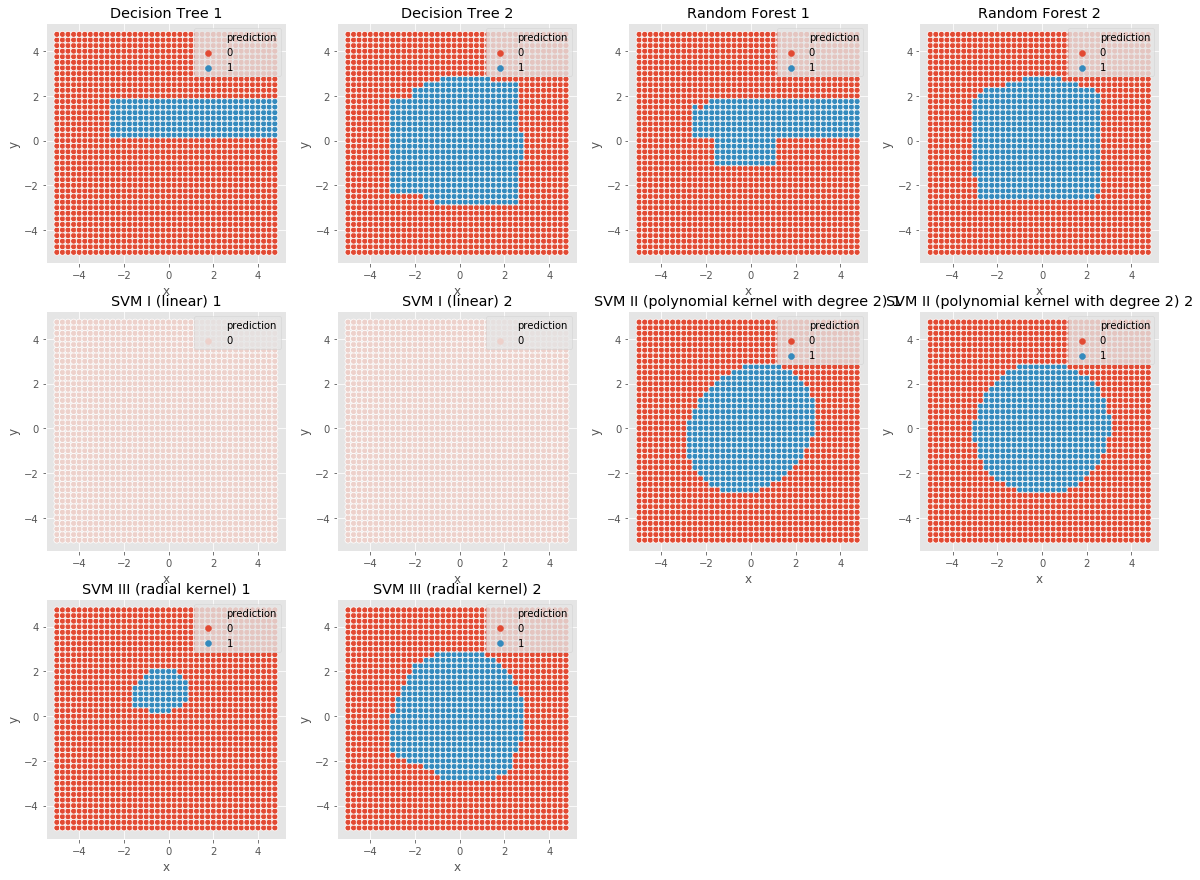

In [25]:
# TODO
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 15] # this is the size for all 12 plots together
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})

# Solution 1
# Decision tree with first dataset
df['prediction'] = dt_1.predict(df[['x','y']]) # this adds the third col to df with 'x' and 'y'
plt.subplot(3,4,1)
plt.title('Decision Tree 1')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# Decision tree with second dataset
df['prediction'] = dt_2.predict(df[['x','y']])
plt.subplot(3,4,2)
plt.title('Decision Tree 2')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# Random forest with first dataset
df['prediction'] = rf_1.predict(df[['x','y']])
plt.subplot(3,4,3)
plt.title('Random Forest 1')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# Random forest with second dataset
df['prediction'] = rf_2.predict(df[['x','y']])
plt.subplot(3,4,4)
plt.title('Random Forest 2')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM I (linear) with first dataset
df['prediction'] = svm_1.predict(df[['x','y']])
plt.subplot(3,4,5)
plt.title('SVM I (linear) 1')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM I (linear) with second dataset
df['prediction'] = svm_2.predict(df[['x','y']])
plt.subplot(3,4,6)
plt.title('SVM I (linear) 2')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM II (polynomial kernel with degree 2) with first dataset
df['prediction'] = svm_poly_1.predict(df[['x','y']])
plt.subplot(3,4,7)
plt.title('SVM II (polynomial kernel with degree 2) 1')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM II (polynomial kernel with degree 2) with second dataset
df['prediction'] = svm_poly_2.predict(df[['x','y']])
plt.subplot(3,4,8)
plt.title('SVM II (polynomial kernel with degree 2) 2')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM III (radial kernel) with first dataset
df['prediction'] = svm_rbf_1.predict(df[['x','y']])
plt.subplot(3,4,9)
plt.title('SVM III (radial kernel) 1')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# SVM III (radial kernel) with second dataset
df['prediction'] = svm_rbf_2.predict(df[['x','y']])
plt.subplot(3,4,10)
plt.title('SVM III (radial kernel) 2')
sns.scatterplot(x='x', y='y', hue='prediction', data=df).set_aspect('equal')

# Solution 2
# Create a list or dictionary of models and iterate over that

**e. Interpret the results. Which classifiers were able to recognize the circular shape? How did different learning algorithms perform, are the results what you would have expected? Was the original training data size important and how did it influence the results?**

**<font color='red'>Answer:</font>** Support vector machine classifier was able to recognize the circular shape, but not with the linear method.  SVM was able to recognize with non-linear methods called "kernel SVM" which map points non-linearly into a higher-dimensional space where the points become linearly separable. <br/> <br/> Regarding other classifiers: Decision Tree performed as expected,because it makes division linearly and so the rectangular outcome was logical. The Random Forest classifier was probably exptected to give better result compared to a purely rectangular shape of predictions. <br/> <br/> The size of original training data was important  as demonstrated by the results. For the 500-point training set the predictions are much more precise in all classifiers except SVM polynomial kernel, which has the best prediction also with the small training data set.

# Task B1 (OPTIONAL BONUS TASK). SVM model visualization  (1 point)

This task is a bonus task, meaning that you can earn bonus points that will be added to your homework, project and exam points. For example, if you get 89 points in total from homework, project and exam, but you have earned 2 bonus points from your homeworks, then you get the grade `A` because your final score will be 89+2=91.

Train an SVM on this toy dataset. Use the linear kernel <code>kernel='linear'</code>. Visualize the decision boundary with a black line and highlight all support vectors. Write out the equation of the decision boundary line. Additionally, draw two dashed lines which pass through the support vectors and are parallel to decision boundary - also called support vector lines. One of these lines must go through the positive support vectors and the other through negative support vectors.

In [26]:
data = pd.DataFrame({
    'x1': [1,1,2,4,6,5,6,7,11,11],
    'x2': [1,3,5,2,6,9,1,6,3,7],
    'y':  [0,0,0,0,1,1,0,1,1,1]
})
data

,x1,x2,y
0,1,1,0
1,1,3,0
2,2,5,0
3,4,2,0
4,6,6,1
5,5,9,1
6,6,1,0
7,7,6,1
8,11,3,1
9,11,7,1


## <font color='red'>This was the last task! Please restart the kernel and run all before submission! (`Kernel -> Restart and Run All`)</font>

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 0.5 hours or 24 hours. Please count in astronomical hours (1 hour = 60 minutes) and not academic hours (1 hour = 45 minutes). The collected information will be used to improve future homeworks.
<font color = "red"><b> Please replace "X" with the amount of hours and don't change the unit "hours" or write any other text. </b></font>

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>Task 2 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>Task 3 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>Task B1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>TOTAL (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>THANK YOU FOR YOUR EFFORT!</font>**